# import pandas as pd

## Workshop: Pandas and Data Manipulation

In this workshop, we will use pandas to load, describe, and query 

### Cheatsheet

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

### References

1. https://pandas.pydata.org/pandas-docs/stable/  
2. Python Data Science Handbook by Jake VanderPlas
3. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython by Wes McKinney
4. https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html


### Installation

Windows: Start Button -> "Anaconda Prompt"

Ubuntu / MacOS: conda should be in your path

Activate the environment

```
conda activate module1
```

Pandas should already be installed. If not, install it:

```
conda install pandas
```

Tip: You can check the versions installed by calling Python with a script:
```
python -c "import pandas; print(pandas.__version__)"
```

### SGD to USD Exchange Rate Data

Similar to the NumPy workshop, we'll use the historical SGD to USD exchange rates from data.gov.sg to demonstrate some Pandas concepts.

In [ ]:
from IPython.display import IFrame

IFrame('https://data.gov.sg/dataset/exchange-rates-sgd-per-unit-of-usd-average-for-period-annual/resource/f927c39b-3b44-492e-8b54-174e775e0d98/view/43207b9f-1554-4afb-98fe-80dfdd6bb4f6', width=600, height=400)

### Download Instructions

You should already have this dataset from the NumPy workshop. If not, here are the instructions:

1. Go to https://data.gov.sg/dataset/exchange-rates-sgd-per-unit-of-usd-average-for-period-annual
2. Click on the `Download` button
3. Unzip and extract the `.csv` file. Note the path for use below.

### Import the package

In [ ]:
import pandas as pd

In [90]:
pd?

### Two main data structures

1. Series
2. DataFrame

### Series
```
pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```
- Similar to 1-d numpy array but with more flexible explicit indexing
- Has two components : index and value for each element
- A bit similar concept as dictionary
- [more here..](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html')

### DataFrame
```
pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
```
- The primary pandas data structure
- Tabular format similar to excel
- Two-dimensional, potentially heterogeneous tabular data
- structure with labeled axes (rows and columns). Row and columns index
- Can be thought of as a dict-like container for Series objects. 
- [more here..](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

### Read data from CSV to a Series

You can use `pandas.read_csv` to read data into:
- A Series, if the data contains only 1 column and you specify the `squeeze=True` option, or
- A DataFrame, for any number of columns. This is the default behavior because the DataFrame is the most flexible.

[more here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [6]:
# Read data into a series
sgd_usd_series = pd.read_csv('D:/tmp/exchange-rates/exchange-rates-sgd-per-unit-of-usd-daily.csv',
                     parse_dates=True, index_col=0, infer_datetime_format=True,
                     squeeze=True)

# inspect the first 10 values
sgd_usd_series.head(10)

date
1988-01-08    2.0443
1988-01-15    2.0313
1988-01-22    2.0205
1988-01-29    2.0182
1988-02-05    2.0160
1988-02-12    2.0173
1988-02-19    2.0189
1988-02-26    2.0130
1988-03-04    2.0154
1988-03-11    2.0131
Name: exchange_rate_usd, dtype: float64

In [19]:
sgd_usd_series.describe()

count    3993.000000
mean        1.494808
std         0.197901
min         1.200900
25%         1.303300
50%         1.462200
75%         1.669100
max         2.050300
Name: exchange_rate_usd, dtype: float64

In [7]:
# Read data into a data frame
sgd_usd_df = pd.read_csv('D:/tmp/exchange-rates/exchange-rates-sgd-per-unit-of-usd-daily.csv',
                     parse_dates=True, index_col=0, infer_datetime_format=True)

# inspect the first 10 values
sgd_usd_df.head(10)

,exchange_rate_usd
date,
1988-01-08,2.0443
1988-01-15,2.0313
1988-01-22,2.0205
1988-01-29,2.0182
1988-02-05,2.0160
1988-02-12,2.0173
1988-02-19,2.0189
1988-02-26,2.0130
1988-03-04,2.0154


In [18]:
sgd_usd_df.describe()

,exchange_rate_usd
count,3993.000000
mean,1.494808
std,0.197901
min,1.200900
25%,1.303300
50%,1.462200
75%,1.669100
max,2.050300


### Get values or indices

Series
- use series.values
- use series.index

DataFrame
- use df.values
- use df.index

Note: these are properties, not function calls with ()

For this dataset:
- Series.values is a 1 dimensional numpy.array
- DataFrame.values is not. It's actually 2 dimensional:

    number of samples (rows) x 1 (column)
   
This is because DataFrame is a more general data structure that can hold more columns.

In [8]:
sgd_usd_series.values

array([ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827])

In [9]:
sgd_usd_df.values

array([[ 2.0443],
       [ 2.0313],
       [ 2.0205],
       ..., 
       [ 1.3763],
       [ 1.3834],
       [ 1.3827]])

In [10]:
sgd_usd_series.values.shape

(3993,)

In [13]:
sgd_usd_series.values.ndim # rank = 1

1

In [11]:
sgd_usd_df.values.shape

(3993, 1)

In [12]:
sgd_usd_df.values.ndim # rank = 2

2

In [15]:
# Tip: you can flatten the 3993 x 1 numpy array
sgd_usd_df.values.flatten()

array([ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827])

The .index is the same whether it is a Series or a DataFrame

In [16]:
sgd_usd_series.index

DatetimeIndex(['1988-01-08', '1988-01-15', '1988-01-22', '1988-01-29',
               '1988-02-05', '1988-02-12', '1988-02-19', '1988-02-26',
               '1988-03-04', '1988-03-11',
               ...
               '2015-10-06', '2015-10-07', '2015-10-08', '2015-10-09',
               '2015-10-12', '2015-10-13', '2015-10-14', '2015-10-15',
               '2015-10-16', '2015-10-19'],
              dtype='datetime64[ns]', name='date', length=3993, freq=None)

In [51]:
sgd_usd_df.index

DatetimeIndex(['1988-01-08', '1988-01-15', '1988-01-22', '1988-01-29',
               '1988-02-05', '1988-02-12', '1988-02-19', '1988-02-26',
               '1988-03-04', '1988-03-11',
               ...
               '2015-10-06', '2015-10-07', '2015-10-08', '2015-10-09',
               '2015-10-12', '2015-10-13', '2015-10-14', '2015-10-15',
               '2015-10-16', '2015-10-19'],
              dtype='datetime64[ns]', name='date', length=3993, freq=None)

### Get the summary

Try these on `sgd_usd_series` and `sgd_usd_df`. 

|  |  |
|--|--|
|df.columns | Describe DataFrame columns|
|df.info() | Information on a DataFrame |
|series.count(), df.count() | Number of non-NA values|
|series.count() | Number of non-NA values|

Note: these are from the Cheatsheet. Series supports fewer methods.

### Get statistics

Try these on `sgd_usd_series` and `sgd_usd_df`. 

|  |  |
|--|--|
|series.sum(), df.sum() | Sum of values|
|series.cumsum(), df.cumsum() | Cummulative sum of values |
|series.min()/series.max(), df.min()/df.max() | Minimum/maximum values|
|series.idxmin()/series.idxmax(), df.idxmin()/df.idxmax() | Minimum/Maximum index value|
|series.describe(), df.describe() | Summary statistics |
|series.mean(), df.mean() | Mean of values |
|series.median(), df.median() | Median of values | 

Note: these are from the Cheatsheet

### Joins

Let's say we need to also show Singapore Dollar and Renminbi (CNY) exchange rates, but from a different data set.

This dataset is already downloaded for you in the `data` folder.

In [52]:
# data source: https://www.exchangerates.org.uk
sgd_cny_df = pd.read_csv('data/sgd_cny_rates_daily.csv',
                          parse_dates=True, index_col=0, infer_datetime_format=True)
print('First 5 entries:')
sgd_cny_df.head(5)

First 5 entries:


,Singapore Dollar to Chinese Yuan
Date,
2018-05-27,4.7499
2018-05-26,4.7620
2018-05-25,4.7610
2018-05-24,4.7618
2018-05-23,4.7553


In [53]:
sgd_cny_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3224 entries, 2018-05-27 to 2009-10-06
Data columns (total 1 columns):
Singapore Dollar to Chinese Yuan    3224 non-null float64
dtypes: float64(1)
memory usage: 50.4 KB


In [54]:
sgd_usd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3993 entries, 1988-01-08 to 2015-10-19
Data columns (total 1 columns):
exchange_rate_usd    3993 non-null float64
dtypes: float64(1)
memory usage: 222.4 KB


`sgd_cny_df`: DatetimeIndex: 3224 entries, 2018-05-27 to 2009-10-06

`sgd_usd_df`: DatetimeIndex: 3993 entries, 1988-01-08 to 2015-10-19

- have different date ranges
- one is in decreasing time order, the other is increasing time order 

Pandas DataFrames make it easy to join these datasets together based on index.

You can do this without looping over the data, using `DataFrame.join()`

[more info..](https://pandas.pydata.org/pandas-docs/stable/merging.html#joining-on-index)

In [83]:
# Default join is an `left` join, where the index of the left series (`sgd_usd_df`) is preserved.

sgd_usd_cny = sgd_usd_df.join(sgd_cny_df)
sgd_usd_cny

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
1988-01-08,2.0443,NaN
1988-01-15,2.0313,NaN
1988-01-22,2.0205,NaN
1988-01-29,2.0182,NaN
1988-02-05,2.0160,NaN
1988-02-12,2.0173,NaN
1988-02-19,2.0189,NaN
1988-02-26,2.0130,NaN
1988-03-04,2.0154,NaN
1988-03-11,2.0131,NaN


We can remove the NaN entries using dropna()

In [84]:
sgd_usd_cny = sgd_usd_cny.dropna()
sgd_usd_cny

,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2009-10-06,1.4046,4.8734
2009-10-07,1.4031,4.8754
2009-10-08,1.3949,4.9082
2009-10-09,1.3918,4.9039
2009-10-12,1.4014,4.8791
2009-10-13,1.3972,4.8871
2009-10-14,1.3939,4.9050
2009-10-15,1.3861,4.9157
2009-10-16,1.3884,4.9051
2009-10-19,1.3953,4.9037


The result is a DataFrame with entries where both exchange rates are present.

Entries where either SGD-USD or SGD-CNY are missing are excluded.

Note that even though the index for the series are in different order, join will still work because it matches the individual index values

### When in doubt, visualize

Let's visualize what we just did by plotting the dataframes.

You should have already installed matplotlib. If not, do this:
```
conda install matplotlib
```

In [85]:
# Find the names of the columns
sgd_usd_cny.columns

Index(['exchange_rate_usd', 'Singapore Dollar to Chinese Yuan'], dtype='object')

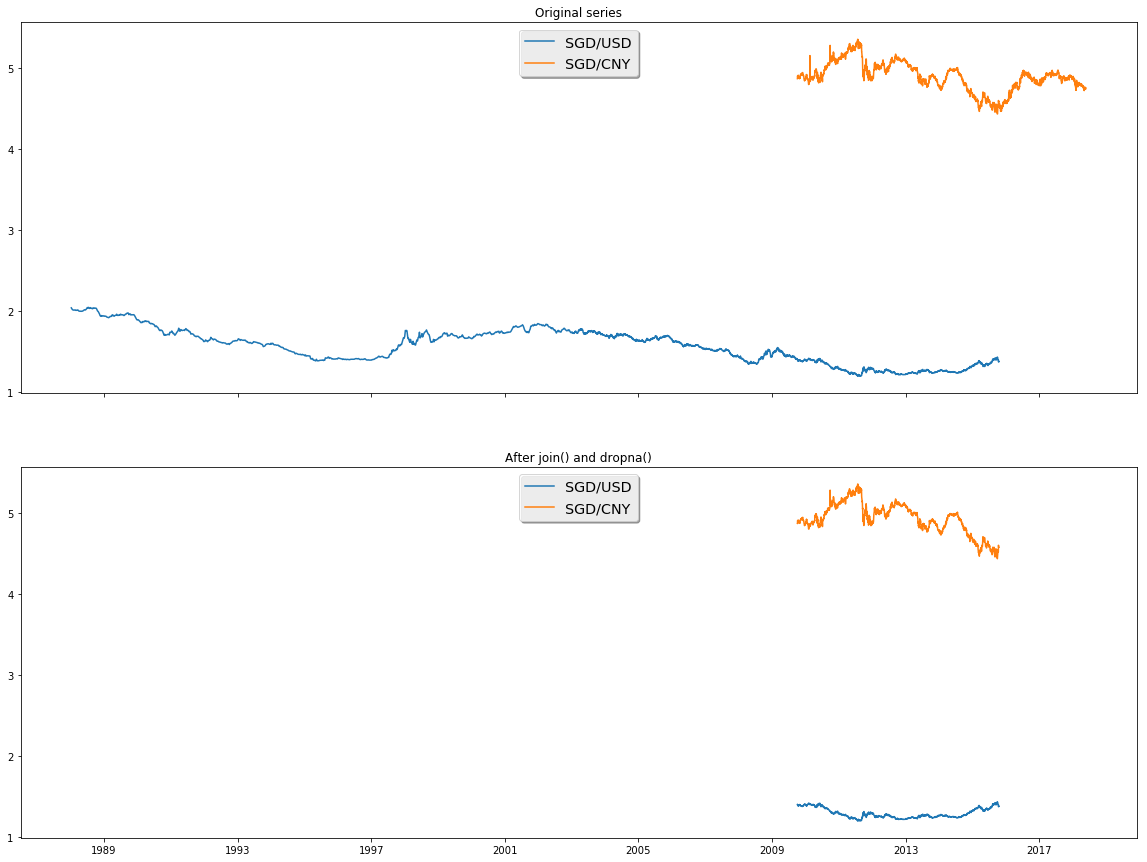

In [86]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,15),
                              sharex=True) # common x-axis for all subplots

ax1.set_title('Original series')
ax1.plot(sgd_usd_df, label='SGD/USD')
ax1.plot(sgd_cny_df, label='SGD/CNY')
ax1.legend(loc='upper center', shadow=True, fontsize='x-large')

ax2.set_title('After join() and dropna()')
ax2.plot(sgd_usd_cny['exchange_rate_usd'], label='SGD/USD')
ax2.plot(sgd_usd_cny['Singapore Dollar to Chinese Yuan'], label='SGD/CNY')
ax2.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

### Exercise

1. Repeat the above using other types of join, such as `outer`

2. What happens if you join the SGD/CNY DataFrame with the SGD/USD DataFrame?

```
sgd_cny_usd = sgd_cny_df.join(sgd_usd_df)
```

### Pandas, like SQL

If you have worked with SQL or databases before, the DataFrame.join() is conceptually the same as SQL.

[Here's](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html) a guide that compares Pandas with SQL.

We'll do an example with queries to demonstrate how you can think of Pandas as conceptually equivalent to SQL.

### Exercise: Querying a DataFrame

Let's say you want to query a DataFrame using something equivalent to this SQL syntax:

```
SELECT *
FROM sgd_usd_cny
WHERE date >= '2012-01-01' AND date < '2013-01-01';
```

What will you use in Pandas?

In [ ]:
# Use pandas to find all exchange rates from 2012
#
# Refer to https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html
#
# Hint 1: use pd.to_datetime
# start = pd.to_datetime('2012-01-01')
# end = pd.to_datetime('2013-01-01')
#
# Hint 2: use sgd_usd_cny.index











### loc, iloc

### Missing data

|  |  |
|--|--|
|dropna|Drop missing values|
|fillna(new_value)|Fill missing values with new_value|
|interpolate()|Use linear interpolation|

### Handling Categories

The previous dataset shows how to use pandas for datasets with continous variables (the exchange rate).

Let's see another dataset that demonstrates how to use pandas for discrete values.